Step 1: Data Injestion


In [3]:
import pandas as pd
import numpy as np

In [4]:
from sklearn.datasets import make_regression

In [5]:
data = make_regression(n_samples = 10000, n_features=1,n_informative=1,n_targets=1,noise=13)

In [6]:
data

(array([[-0.06580678],
        [-0.46901284],
        [ 0.76269575],
        ...,
        [ 1.60376792],
        [-0.60333908],
        [ 2.03617296]]),
 array([-14.82101297, -40.12356746,  40.4014133 , ...,  74.28352753,
        -25.29252368,  63.90914186]))

In [7]:
df = pd.DataFrame(data[0],columns=['X'])
df.head()

,X
0,-0.065807
1,-0.469013
2,0.762696
3,-0.478222
4,0.342845


In [8]:
df['Y'] = data[1]
df.head()

,X,Y
0,-0.065807,-14.821013
1,-0.469013,-40.123567
2,0.762696,40.401413
3,-0.478222,-0.996227
4,0.342845,25.197370


In [9]:
df

,X,Y
0,-0.065807,-14.821013
1,-0.469013,-40.123567
2,0.762696,40.401413
3,-0.478222,-0.996227
4,0.342845,25.197370
...,...,...
9995,0.793018,49.240757
9996,1.477604,70.202502
9997,1.603768,74.283528
9998,-0.603339,-25.292524


In [10]:
from matplotlib import pyplot as plt

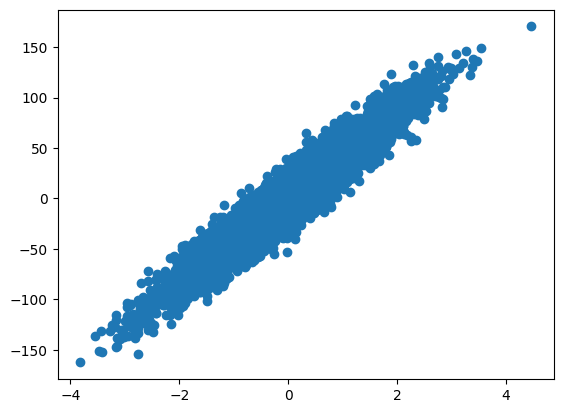

In [11]:
plt.scatter(df['X'],df['Y'])
plt.show()

Step 2 : Data Preprocessing

In [12]:
df.describe()

,X,Y
count,10000.000000,10000.000000
mean,-0.011818,-0.277017
std,0.998649,43.645177
min,-3.819123,-162.620116
25%,-0.695117,-29.918763
50%,-0.006962,-0.386094
75%,0.675536,29.622530
max,4.460742,170.433741


Step 3:Spliting of data into train set

In [13]:
X = df['X']
Y = df['Y']

In [14]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test = tts(X,Y,train_size=0.80)

In [15]:
X_train.shape, Y_train.shape

((8000,), (8000,))

In [16]:
X_test.shape, Y_test.shape

((2000,), (2000,))

In [17]:
X_train = np.array(X_train).reshape((-1,1))
Y_train = np.array(Y_train).reshape((-1,1))
X_test = np.array(X_test).reshape((-1,1))
Y_test = np.array(Y_test).reshape((-1,1))

## Step 4: Model Building

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()

In [20]:
model.fit(X_train,Y_train)

LinearRegression()

In [21]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

In [22]:
model.coef_
model.intercept_

array([0.24874056])

# Cross Validation


In [28]:
from sklearn.model_selection import KFold
validation = KFold(10)

In [25]:
import numpy as np
x = np.array(X).reshape(-1,1)
y = np.array(Y).reshape(-1,1)

In [29]:
from sklearn.model_selection import cross_val_score
result = cross_val_score(model,x,y,cv=validation)

In [30]:
print(result)

[0.90896642 0.90020801 0.92307515 0.91703702 0.9153049  0.91779372
 0.91408711 0.91410699 0.91153796 0.9118216 ]


In [31]:
result.mean()

0.913393889045596

Step 5: Model Evaluation

In [ ]:
from sklearn.metrics import r2_score as r2
def adj_r2(act,pred):
    return 1-((1-r2(act,pred))*(act.shape[0]-1))/(act.shape[0]-1-1)
print("Adj. R2 score: ",adj_r2(Y_train,Y_train_pred))

Adj. R2 score:  0.9269987599562536


In [ ]:
print("Adj. R2 score: ",adj_r2(Y_test,Y_test_pred))

Adj. R2 score:  0.922013753995029


## Saving the model

In [ ]:
import pickle

In [ ]:
with open("model.pkl",'wb') as file:
    pickle.dump(model,file)
    file.close()



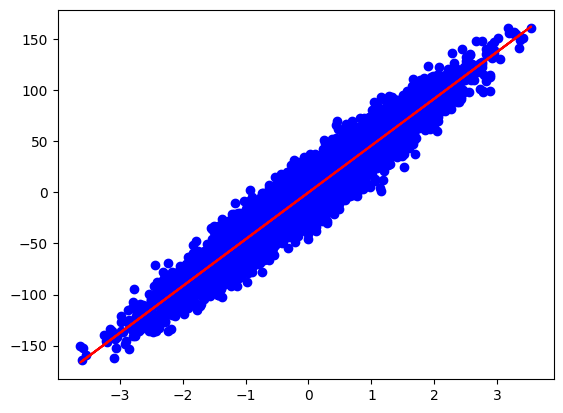

In [ ]:
plt.scatter(X_train,Y_train,c='b')
plt.scatter(X_test,Y_test,c='b')
plt.plot(X_train,Y_train_pred,c='red')
plt.plot(X_test,Y_test_pred,c='red')
plt.show()

## Best Model